<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/Classification/Titanc-Survival-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
!rm titanic_train.csv
!wget https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv

--2025-09-19 12:51:51--  https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv [following]
--2025-09-19 12:51:51--  https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-09-19 12:51:51 (5.63 MB/s) - ‘titanic_train.csv’ saved [60302/60302]



In [ ]:
df = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('PassengerId',axis=1,inplace=True)

# Prepare Data

Let's begin some exploratory data analysis! We'll start by checking out missing data!



## Check Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

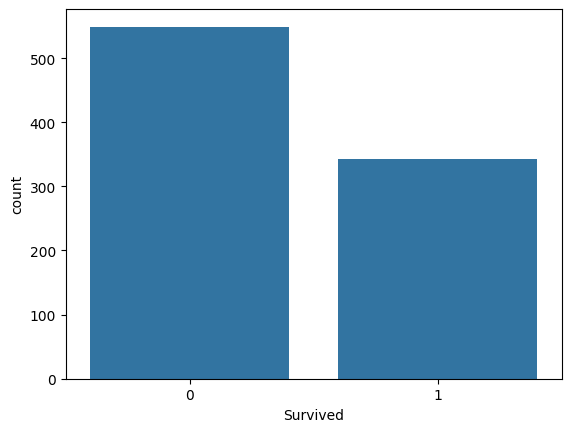

In [ ]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

___
## Data Cleansing


In [ ]:
# Function to impute age based on Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()
        else:
            return df[df['Pclass'] == 3]['Age'].mean()

    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-3602050346.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3602050346.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [ ]:
# check again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Fill missing values in "Embarked" with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

/tmp/ipython-input-69337452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


In [ ]:
#Dropping columns "Name" and "Ticket"
df.drop(['Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [ ]:
df.drop(['Sex'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,sex],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male
0,0,3,22.0,1,0,7.2500,NaN,S,True
1,1,1,38.0,1,0,71.2833,C85,C,False
2,1,3,26.0,0,0,7.9250,NaN,S,False
3,1,1,35.0,1,0,53.1000,C123,S,False
4,0,3,35.0,0,0,8.0500,NaN,S,True


In [ ]:
#Converting column "Cabin" to categorical features (Known/Unknown)
df['Cabin_Known'] = df['Cabin'].apply(lambda x: True if pd.notnull(x) else False)
df.drop('Cabin', axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Cabin_Known
0,0,3,22.0,1,0,7.2500,S,True,False
1,1,1,38.0,1,0,71.2833,C,False,True
2,1,3,26.0,0,0,7.9250,S,False,False
3,1,1,35.0,1,0,53.1000,S,False,True
4,0,3,35.0,0,0,8.0500,S,True,False


In [ ]:
#Convert "Embarked" into categorical features using 2 dummies variable
embark_dummies = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, embark_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Cabin_Known,Q,S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   male         891 non-null    bool   
 7   Cabin_Known  891 non-null    bool   
 8   Q            891 non-null    bool   
 9   S            891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(list(y_test[:10]))
print(y_pred[:10])

[0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[0 0 0 0 1 0 0 1 1 0]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[143,  22],
       [ 38,  65]])

In [ ]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7901    0.8667    0.8266       165
           1     0.7471    0.6311    0.6842       103

    accuracy                         0.7761       268
   macro avg     0.7686    0.7489    0.7554       268
weighted avg     0.7736    0.7761    0.7719       268



## Check model parameters

In [ ]:
print(X.columns)
print(model.intercept_)
print(model.coef_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Cabin_Known', 'Q',
       'S'],
      dtype='object')
[4.48935275]
[[-9.89529192e-01 -4.20227379e-02 -2.31436104e-01 -1.05035870e-01
   8.46914249e-04 -2.72735558e+00  7.99159044e-01  2.74799232e-01
  -3.26217547e-02]]


# Compute Odds ratio (Age)

In [ ]:
# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a pandas Series of coefficients with feature names as index
coef_series = pd.Series(coefficients, index=feature_names)

# Get the coefficient for 'Age'
age_coef = coef_series['Age']

# Compute the odds ratio for 'Age'
age_odds_ratio = np.exp(age_coef)

print(age_odds_ratio)

0.9588479781054696


# Summary

มีการใช้ Variable ทั้งหมด 8 ตัว ได้แก่

* PClass
* Age
* SibSp
* Parch
* Fare
* Sex
* Cabin
* Embarked

โดยมีการทำ Data Cleasing ดังนี้

* Drop variable 2 ตัว คือ Name และ Ticket
* เติมค่า Age ที่หายด้วย mean ของแต่ละ PClass
* เติมค่า Embarked ที่หายด้วย Mode
* ปรับตัวแปร Sex ให้เป็น Male
* ปรับตัวแปร Cabin เป็น Cabin_Known
* สร้าง Dummy variable 2 ตัว สำหรับตัวแปร Embarked (Q, S)

เมื่อทำการสร้างและ Train โมเดล จะได้โมเดลที่มีสมการดังนี้

* logit(p_Survived) = 4.49 - 9.895e-01 PClass - 4.20e-02 Age - 2.31e-01 SibSp - 1.05e-01 Parch + 8.47e-04 Fare - 2.73 male + 7.99e-01 Cabin_Known + 2.75e-01 Q - 3.26e-02 S

ได้ค่า **macro avg F1-Score = 0.7554** ซึ่งมีค่า**มากกว่า**ตัว Simple model ของ demo ที่ 0.7186

แสดงให้เห็นว่าโมเดลที่ทำขึ้นมาใหม่มีประสิทธิภาพในการทำนายมากกว่า

นอกจากนี้ จากการ หาค่า Odds ratio ของตัวแปร Age พบว่ามีค่าอยู่ที่ 0.9588 หมายความว่า

**ทุกๆอายุที่เพิ่มขึ้น 1 ปี จะทำให้โอกาสในการรอดลดลง 1 - 0.9588 = 0.0412 = 4.12%**
